<a href="https://colab.research.google.com/github/fredyvel/07MBIG---Visualizacion-De-Datos/blob/master/AG3_FV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [16]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [17]:
titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[891 rows x 15 columns]>

In [18]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [19]:
titanic.rename(columns={'class': 'clase'},inplace=True)



In [20]:
def is_old_func(row):
  return row['age']>60

titanic['is_old']=titanic.apply(is_old_func,axis='columns')


In [21]:
titanic.eval('is_baby=age<15',inplace=True)

In [22]:
titanic[
(titanic.sex=='female')
&(titanic['clase'].isin(['First','Third']))
&(titanic.age>45)
&(titanic.survived==0) 
]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False


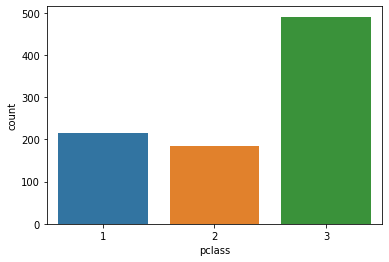

In [23]:
sns.countplot(x='pclass',data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


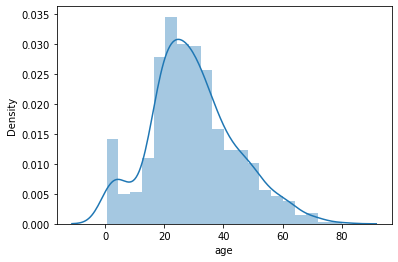

In [24]:
sns.distplot(titanic.age.dropna())
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


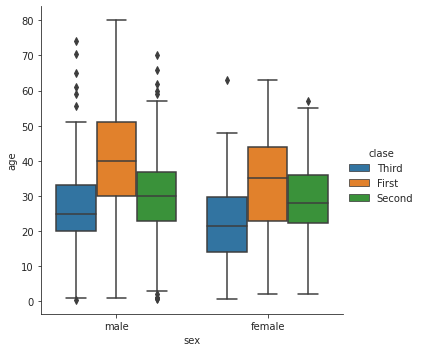

In [25]:
with sns.axes_style(style='ticks'):
  ax=sns.catplot('sex','age','clase',
  data=titanic,kind='box')

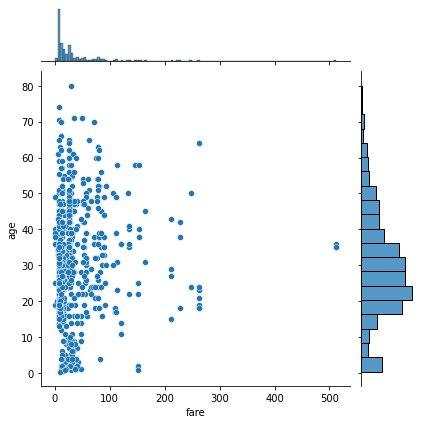

In [26]:
sns.jointplot(x='fare',y='age',data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

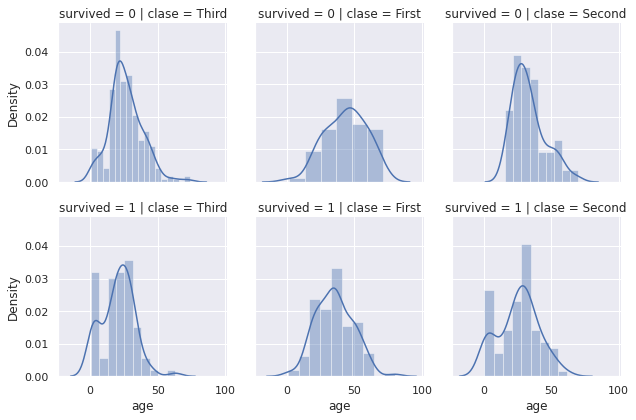

In [27]:
sns.set(font_scale=1)
g=sns.FacetGrid(titanic,row='survived',col='clase')
g.map(sns.distplot,'age')
plt.show()

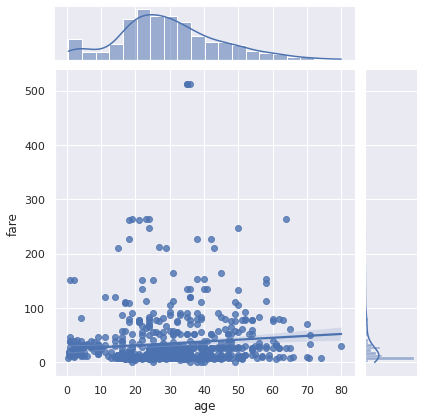

In [29]:
sns.jointplot(data=titanic,x='age',y='fare',
            kind='reg',color='b')
plt.show()

Text(0.5, 1.0, 'titanic.corr()')

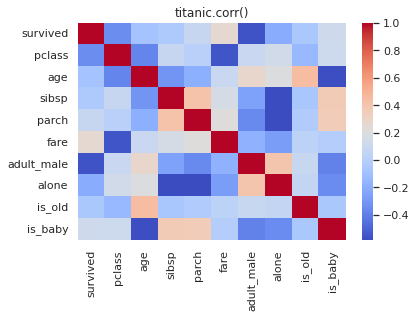

In [30]:
tc=titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

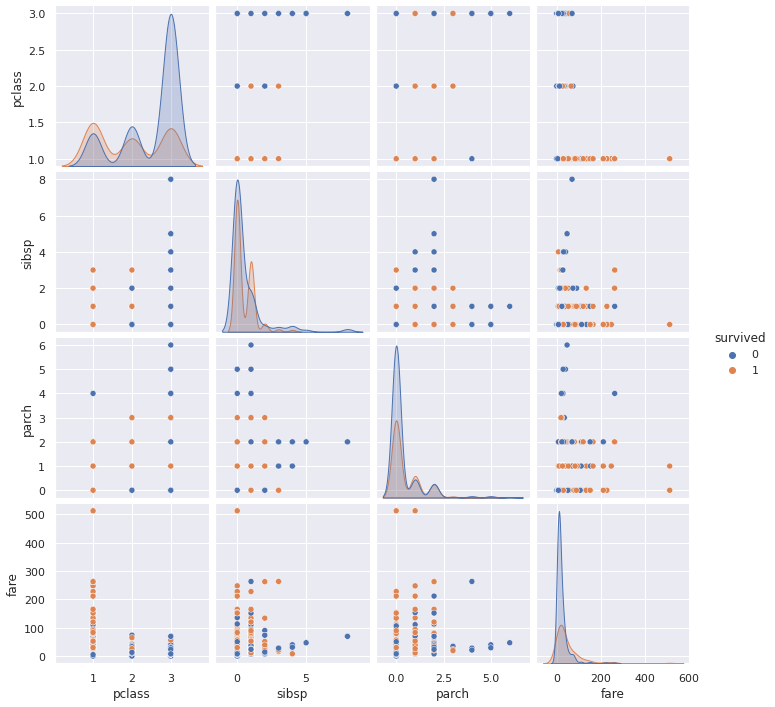

In [34]:
titanic_num =titanic[['survived','pclass','sibsp','parch','fare']]
sns.pairplot(titanic_num, hue="survived")
plt.show()

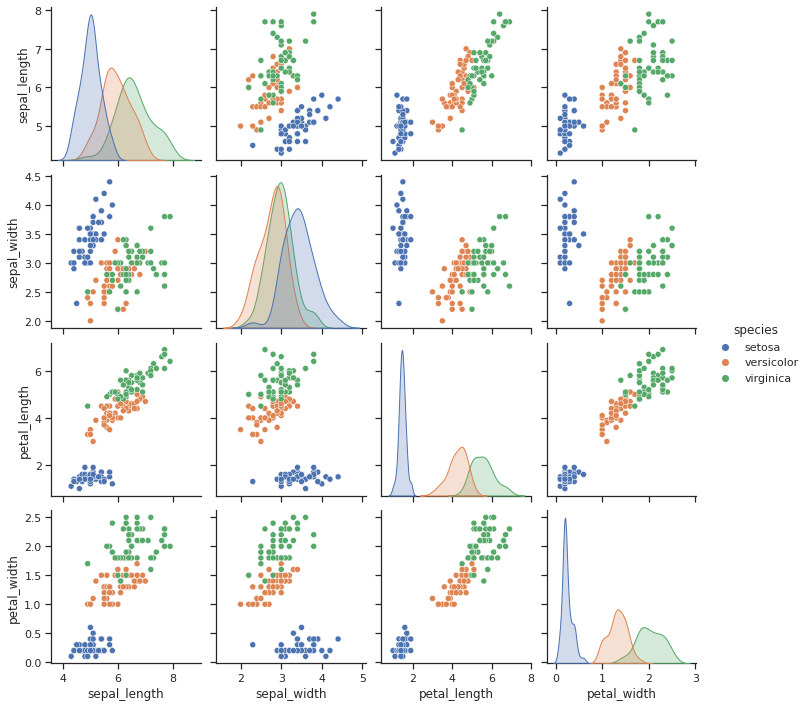

In [35]:
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")